### Importing libraries & functions





In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

### Importing dataset

In [3]:
data=pd.read_excel("Dataset_CreditScoring.xlsx")

### Data preparation

In [4]:
#  count of rows and columns
data.shape

(3000, 30)

In [5]:
#shows first few rows of the code
data.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [6]:
#dropping customer ID column from the dataset
dataset=data.drop('ID',axis=1)
dataset.shape

(3000, 29)

In [7]:
# explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [8]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [9]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [10]:
# count of good loans (0) and bad loans (1)
dataset['TARGET'].value_counts()

TARGET
0    2500
1     500
Name: count, dtype: int64

In [11]:
# data summary across 0 & 1
dataset.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


In [12]:
#data imblance, categorical values, handling missing values, feature scaling techniques

### Train Test Split

In [13]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [14]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=y) #for class imbalance

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# # Exporting Normalisation Coefficients for later use in prediction
# import joblib
# joblib.dump(sc, '/content/drive/My Drive/1_LiveProjects/Project1_Credit_Scoring/f2_Normalisation_CreditScoring')

### Risk Model building

In [17]:
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
# # Exporting Logistic Regression Classifier for later use in prediction

# # import joblib
# joblib.dump(classifier, '/content/drive/My Drive/1_LiveProjects/Project1_Credit_Scoring/f1_Classifier_CreditScoring')

### Model *performance*

In [19]:
#TP, FN
#FP, TN
#Precision , accuracy, recall/sensitivity, F1-score
print(confusion_matrix(y_test,y_pred))

[[487  13]
 [ 87  13]]


In [20]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334


### Writing output file

In [21]:
#1 col for p=0 and second p=1
probabilities = classifier.predict_proba(X_test)
probabilities

array([[0.61598311, 0.38401689],
       [0.98854759, 0.01145241],
       [0.87096661, 0.12903339],
       ...,
       [0.9445091 , 0.0554909 ],
       [0.46946796, 0.53053204],
       [0.94009714, 0.05990286]])

In [22]:
# writing model output file

df_probabilities = pd.DataFrame(probabilities, columns = ['prob_0', 'prob_1'])
df_predictions = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_actuals = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_probabilities, df_predictions,df_actuals], axis=1)

dfx.to_csv("Model_Predictions.xlsx", sep=',', encoding='UTF-8')

dfx.head()

,prob_0,prob_1,predicted_TARGET,Actual Outcome
0,0.615983,0.384017,0,1
1,0.988548,0.011452,0,0
2,0.870967,0.129033,0,1
3,0.954084,0.045916,0,0
4,0.726195,0.273805,0,1


In [23]:
#Decile method


#create a threhold upto which probability you will give out loans
#aclculate profitability 


In [24]:
#sort data from least risky to most risky (from the predictions)
sorted_df=dfx.sort_values(by='prob_1')
sorted_df.head()

,prob_0,prob_1,predicted_TARGET,Actual Outcome
308,0.990017,0.009983,0,0
379,0.989551,0.010449,0,0
542,0.988764,0.011236,0,0
1,0.988548,0.011452,0,0
51,0.988282,0.011718,0,0


In [25]:
#create decile bins
sorted_df['Decile'] = pd.qcut(sorted_df['prob_1'], q=10, labels=False, duplicates='drop') + 1
sorted_df.tail(10)


,prob_0,prob_1,predicted_TARGET,Actual Outcome,Decile
61,0.316936,0.683064,1,0,10
486,0.310226,0.689774,1,1,10
531,0.309937,0.690063,1,1,10
239,0.305681,0.694319,1,0,10
151,0.298996,0.701004,1,1,10
306,0.249126,0.750874,1,1,10
88,0.239281,0.760719,1,1,10
468,0.229477,0.770523,1,1,10
324,0.128679,0.871321,1,0,10
104,0.082086,0.917914,1,0,10


In [26]:
#summary table - in each decile calculate how many were ACTUALLY GOOD/BAD vs predicted GOOD/BAD
summary_df=sorted_df.groupby('Decile').agg({ 
    'prob_0':['min','count'],
    'Actual Outcome':['sum',lambda x: (x == 1).sum()],
    'Actual Outcome':['sum',lambda y: (y == 0).sum()]
    }).reset_index()
summary_df.columns = ['Decile', 'min_threshold', 'num_Records','bad','good']
summary_df

,Decile,min_threshold,num_Records,bad,good
0,1,0.971645,60,4,56
1,2,0.955151,60,2,58
2,3,0.940326,60,2,58
3,4,0.920607,60,6,54
4,5,0.894363,60,3,57
5,6,0.862453,60,11,49
6,7,0.814302,60,5,55
7,8,0.742077,60,17,43
8,9,0.613224,60,27,33
9,10,0.082086,60,23,37


In [27]:
summary_df['Cumulative_Good'] = summary_df['good'].cumsum()
summary_df['Cumulative_Bad'] = summary_df['bad'].cumsum()
summary_df

,Decile,min_threshold,num_Records,bad,good,Cumulative_Good,Cumulative_Bad
0,1,0.971645,60,4,56,56,4
1,2,0.955151,60,2,58,114,6
2,3,0.940326,60,2,58,172,8
3,4,0.920607,60,6,54,226,14
4,5,0.894363,60,3,57,283,17
5,6,0.862453,60,11,49,332,28
6,7,0.814302,60,5,55,387,33
7,8,0.742077,60,17,43,430,50
8,9,0.613224,60,27,33,463,77
9,10,0.082086,60,23,37,500,100


In [43]:
#find the min of each decile, cumulative good + cumulative bad ==> sepcificity vs sensitivity

total_good_sum = summary_df['good'].sum()
total_bad_sum = summary_df['bad'].sum()

# Calculate the cumulative percentage
summary_df['Cumulative_Good_Percentage'] = (summary_df['Cumulative_Good'] / total_good_sum) * 100 #sensitivity
summary_df['Cumulative_Bad_Percentage'] = (summary_df['Cumulative_Bad'] / total_bad_sum) * 100
summary_df['Cumulative_Bad_Avoided_Percentage'] = (100-summary_df['Cumulative_Bad_Percentage'])  #1-specificity
summary_df

,Decile,min_threshold,num_Records,bad,good,Cumulative_Good,Cumulative_Bad,Cumulative_Good_Percentage,Cumulative_Bad_Percentage,Cumulative_Bad_Avoided_Percentage
0,1,0.971645,60,4,56,56,4,11.2,4.0,96.0
1,2,0.955151,60,2,58,114,6,22.8,6.0,94.0
2,3,0.940326,60,2,58,172,8,34.4,8.0,92.0
3,4,0.920607,60,6,54,226,14,45.2,14.0,86.0
4,5,0.894363,60,3,57,283,17,56.6,17.0,83.0
5,6,0.862453,60,11,49,332,28,66.4,28.0,72.0
6,7,0.814302,60,5,55,387,33,77.4,33.0,67.0
7,8,0.742077,60,17,43,430,50,86.0,50.0,50.0
8,9,0.613224,60,27,33,463,77,92.6,77.0,23.0
9,10,0.082086,60,23,37,500,100,100.0,100.0,0.0


<Figure size 640x480 with 0 Axes>

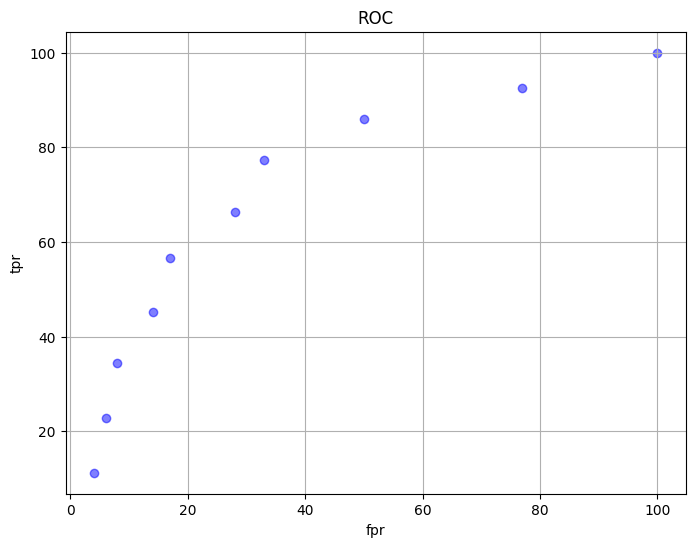

In [44]:
#ROC curve
import matplotlib.pyplot as plt
tpr=summary_df['Cumulative_Good_Percentage']
fpr=summary_df['Cumulative_Bad_Percentage']
plt.clf()
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.scatter(fpr, tpr, color='blue', alpha=0.5)  # Adjust the color and transparency as needed
plt.xlabel('fpr')  # Set the label for the x-axis
plt.ylabel('tpr')  # Set the label for the y-axis
plt.title('ROC')  # Set the title of the plot
plt.grid(True)  # Add gridlines to the plot if desired
plt.show()